HW Assignment 2 for Rahul Rajput

In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [2]:
sales = pd.read_csv("/Users/rahulrajput/Desktop/MSBA/Winter/452 - Machine Learning/Assignment 2/sales.csv")
customer = pd.read_csv("/Users/rahulrajput/Desktop/MSBA/Winter/452 - Machine Learning/Assignment 2/customer.csv")

Question 1

In [3]:
sales.describe()

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2499.500000,0.455067,0.115893,0.085187,0.909147
std,866.169729,0.296090,0.251816,0.091396,0.344035
min,1000.000000,0.000000,0.000000,0.000000,0.490000
25%,1749.750000,0.260000,0.000000,0.040000,0.610000
50%,2499.500000,0.420000,0.000000,0.070000,0.810000
75%,3249.250000,0.610000,0.080000,0.110000,1.150000
max,3999.000000,1.690000,1.710000,1.230000,1.750000


In [4]:
sales

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74
...,...,...,...,...,...
2995,3995,0.20,0.00,0.07,0.49
2996,3996,0.28,0.00,0.04,0.49
2997,3997,0.00,0.49,0.00,0.49
2998,3998,0.07,0.09,0.07,0.49


<AxesSubplot:>

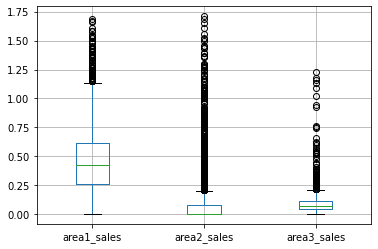

In [5]:
sales.iloc[:,1:4].boxplot()

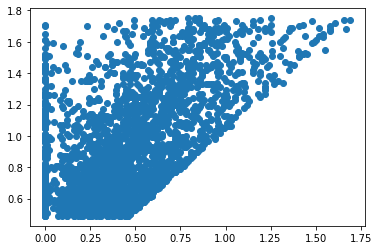

In [6]:
plt.scatter(sales.iloc[:,1],sales['total_sales'])

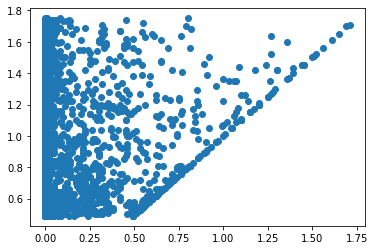

In [7]:
plt.scatter(sales.iloc[:,2],sales['total_sales'])

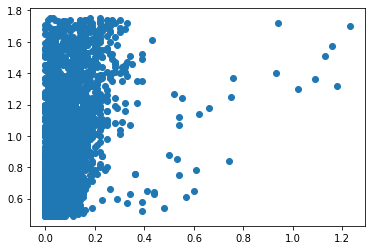

In [8]:
plt.scatter(sales.iloc[:,3],sales['total_sales'])

In [9]:
import seaborn as sns

In [11]:
model1a = sm.OLS.from_formula('total_sales ~ area1_sales + area2_sales + area3_sales', sales).fit()
print(model1a.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2354.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:27:28   Log-Likelihood:                 761.25
No. Observations:                3000   AIC:                            -1515.
Df Residuals:                    2996   BIC:                            -1490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2601      0.008     30.743      

In [12]:
model1b = sm.OLS.from_formula('total_sales ~ area1_sales + area2_sales + area3_sales + area1_sales:area2_sales + area1_sales*area3_sales + area2_sales*area3_sales + area1_sales*area2_sales*area3_sales', sales).fit()
print(model1b.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:28:43   Log-Likelihood:                 830.59
No. Observations:                3000   AIC:                            -1645.
Df Residuals:                    2992   BIC:                            -1597.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

From the Full Model we can see that the interaction between the sales in area 1 and area 3 is significant, i.e., the sales in area 1 and area 3 affect each other and total sales cannot be predicted correctly without taking into account how sales in area 1 would affect sales in area 3.

Question 2

In [13]:
customer

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


We cannot calculate the conventional R-Squared value for a Logistic Regression, however, we use Maximum Likelihood Estimation to arrive at a figure that helps us estimate the amount of error accounted for, which is called Deviance. Through MLE we try to minimise the Deviance. 

In this case we are only comparing in-sample pseudo r-squared values.

In [14]:
model2 = sm.Logit.from_formula('Purchased ~ EstimatedSalary',data=customer).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.584658
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.1032
Time:                        23:28:50   Log-Likelihood:                -233.86
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 2.168e-13
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3227      0.286     -8.134      0.000      -2.882      -1.763
EstimatedSalar

In [15]:
model3 = sm.Logit.from_formula('Purchased ~ Age',data=customer).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.420327
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3553
Time:                        23:28:51   Log-Likelihood:                -168.13
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.356e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0441      0.784    -10.258      0.000      -9.581      -6.507
Age            0.1889      0.

In [16]:
gender_dummy = pd.get_dummies(customer['Gender'])

In [17]:
combined_customer = pd.concat([customer,gender_dummy],axis=1)

In [18]:
combined_customer = combined_customer.drop(['Female'],axis=1)

In [19]:
model5 = sm.Logit.from_formula('Purchased ~ Male',data=combined_customer).fit()
print(model5.summary())

Optimization terminated successfully.
         Current function value: 0.651064
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                0.001384
Time:                        23:28:55   Log-Likelihood:                -260.43
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                    0.3955
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5004      0.144     -3.464      0.001      -0.783      -0.217
Male          -0.1775      0.

In [20]:
model6 = sm.Logit.from_formula('Purchased ~ EstimatedSalary + Age + Male + EstimatedSalary*Age + EstimatedSalary*Male + Age*Male',data=combined_customer).fit()
print(model6.summary())

Optimization terminated successfully.
         Current function value: 0.262888
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5968
Time:                        23:28:56   Log-Likelihood:                -105.16
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 3.155e-64
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -37.0373      4.828     -7.671      0.000     -46.501     -27.574

In [21]:
model7 = sm.Logit.from_formula('Purchased ~ EstimatedSalary + Age + Male + EstimatedSalary*Age',data=combined_customer).fit()
print(model7.summary())

Optimization terminated successfully.
         Current function value: 0.263196
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5963
Time:                        23:29:01   Log-Likelihood:                -105.28
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 4.552e-66
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -37.6865      4.661     -8.085      0.000     -46.822     -28.551
Es

In [22]:
model8 = sm.Logit.from_formula('Purchased ~ EstimatedSalary + Age + EstimatedSalary*Age',data=combined_customer).fit()
print(model8.summary())

Optimization terminated successfully.
         Current function value: 0.266962
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.5905
Time:                        23:29:13   Log-Likelihood:                -106.78
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 1.843e-66
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -36.1099      4.419     -8.172      0.000     -44.770     -27.449
Es

In [23]:
model9 = sm.Logit.from_formula('Purchased ~ EstimatedSalary + Age',data=combined_customer).fit()
print(model9.summary())

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.4688
Time:                        23:29:18   Log-Likelihood:                -138.53
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 7.995e-54
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     -9.566      0.000     -14.982      -9.886
EstimatedSalar

Question 3

By comparing the in-sample pseudo r-squared values I choose to go with model 8 which includes Estimated Salary, Age and the interaction between the 2 variables. The coefficients for Age and Estimated Salary are positive whereas the Intercept and Interaction Effect coefficient are negative. 

The coefficient of Age is the largest implying it is the most significant determinant of Purchase or not among the variables. The negative interaction effect is extremely small implying that age and gender have little effect on whether a consumer will purchase or not.

More the age - more the odds of purchasing
More the Estimated Salary - more the odds of purchasing
Gender - no affect on the odds of purchasing

Question 4

Logistic Regression is a problem of Classification. In this situation we are concerned with understanding how good our system is at classifiying correctly and accuracy may be misleading. We are interested in finding how good our model is at classifying correctly and therefore Precision and Recall are better measures, both of which focus on measuring the percentage of actual correct classifications compared to predicted correct classifications.

We are not as interested in how well our model predicts the negative classifications. Having many correct 'negative' classifications would skew the accuracy metric to be higher even if the precision in classification of 'positives' may be low, therefore we do not go for Accuracy. 

Question 5

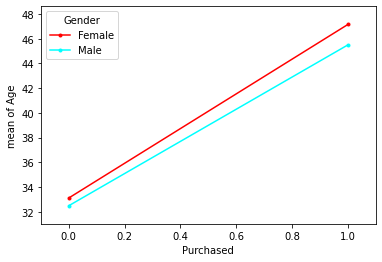

In [25]:
from statsmodels.graphics.factorplots import interaction_plot
#fig = interaction_plot(x = combined_customer['Age'], trace = combined_customer['Male'], response = combined_customer['Purchased'],
#             colors=['red','blue'],markers=["D", "^"])
#sns.regplot()
fig = interaction_plot(customer['Purchased'],customer['Gender'],customer['Age'])

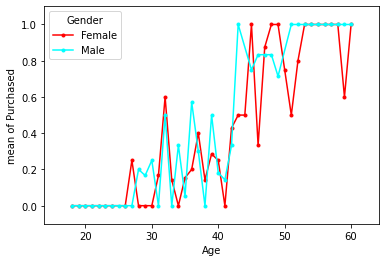

In [28]:
fig = interaction_plot(customer['Age'],customer['Gender'],customer['Purchased'])

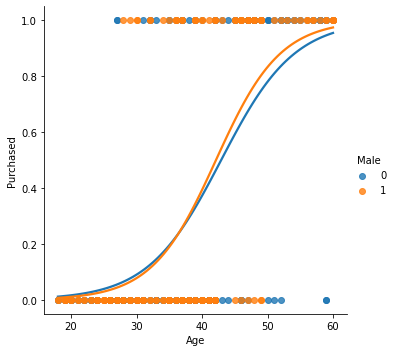

In [27]:
sns.lmplot(data=combined_customer,x='Age',y='Purchased',hue ='Male',logistic=True,ci=False)

From the interaction plots we observe that the likelihood of making a purchase does not vary significantly by gender. Young males and Young females are equally unlikely to purchase and old males and old females are equally likely to purchase. The sigmoid graphs for both genders are quite similar and the regression lines are almost parallel.

Question 6

Part 1
a. Unclear, therefore yes.
b. Yes
c. No

Part 2
a. The likelihood of buying a house changes differently given different average saving levels for each of the income groups.

b. The likelihood of buying a house changes differently given different average saving levels for each of the income groups. As average savings increase, low income groups are more likely to buy houses than previously whereas high income groups are less likely to buy houses than before.

c. The likelihood of buying a house changes in the same proportion given different average savings for each of the income groups. The likelihood of buying a house only depends on the average savings (notwithstanding different starting points for the groups).